In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

amex_df = pd.read_csv('../chapter4/gen/amex_df.csv',
                           parse_dates=True,
                           index_col=0)

In [10]:

# Some people believe price will continue to go up, if the day opened low and closed high
# Let's test this on Amex Stock
low_to_high_df = amex_df.iloc[amex_df[
    (amex_df.close > amex_df.open) & (amex_df.key != amex_df.shape[0] -1)].key.values + 1]
change_ceil_floor = np.where(low_to_high_df['p_change'] > 0,
                             np.ceil(
                                 low_to_high_df['p_change']
                             ),
                             np.floor(
                                 low_to_high_df['p_change']
                             ))
change_ceil_floor = pd.Series(change_ceil_floor)


低开高收的下一个交易日所有下跌的跌幅取整和sum: -138.0
低开高收的下一个交易日所有上涨的涨幅取整和sum: 153.0


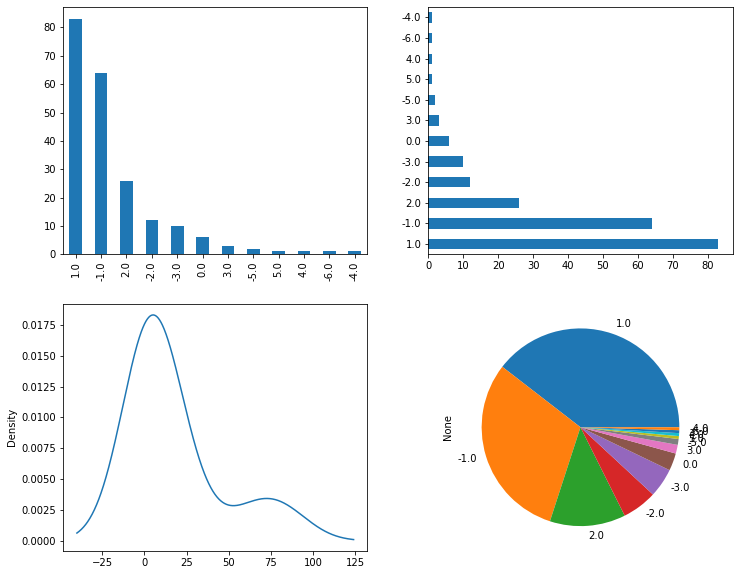

In [11]:

print('低开高收的下一个交易日所有下跌的跌幅取整和sum: {}'.format(change_ceil_floor[change_ceil_floor < 0].sum()))
print('低开高收的下一个交易日所有上涨的涨幅取整和sum: {}'.format(change_ceil_floor[change_ceil_floor > 0].sum()))
# 2 × 2: 4张子图
_, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
# 竖直柱状图，可以看到-1的柱子最高，图5-7左上图
change_ceil_floor.value_counts().plot(kind='bar', ax=axs[0][0])
# 水平柱状图，可以看到-1的柱子最长，图5-7右上图
change_ceil_floor.value_counts().plot(kind='barh', ax=axs[0][1])
# 概率密度图，可以看到向左偏移，图5-7左下图
change_ceil_floor.value_counts().plot(kind='kde', ax=axs[1][0])
# 圆饼图，可以看到-1所占的比例最高，-2的比例也大于+2，图5-7右下图
change_ceil_floor.value_counts().plot(kind='pie', ax=axs[1][1])